In [12]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Full signal correlations

In [13]:
def plot_channels(data, time, channels, limit = None):
    figure, axes = plt.subplots(nrows = len(channels), figsize = (20, 0.75 * len(channels)))
    plt.subplots_adjust(
        left = 0.1,
        bottom = 0.1,
        right = 0.9,
        top = 0.9,
        wspace = 0,
        hspace = 0
    )

    x = time

    for i, channel in enumerate(channels):
        y = data[:, i]
        axes[i].plot(x, y, linewidth = 0.5, color = 'black')

        if limit is not None:
            axes[i].set_ylim(-limit, limit)

        axes[i].set_xlim(0, 10)
        axes[i].get_xaxis().set_ticks([])
        axes[i].get_yaxis().set_ticks([])
        axes[i].set_ylabel(channel, rotation = 0, labelpad = 60, loc = 'center')

        if i != 0:
            axes[i].spines['top'].set_visible(False)

        if i != len(channels) - 1:
            axes[i].spines['bottom'].set_visible(False)

    plt.show()

In [14]:
with open('output/spontaneous-movement/W1/C1/vm/filter.pkl', 'rb') as file:
    raw = pickle.load(file)

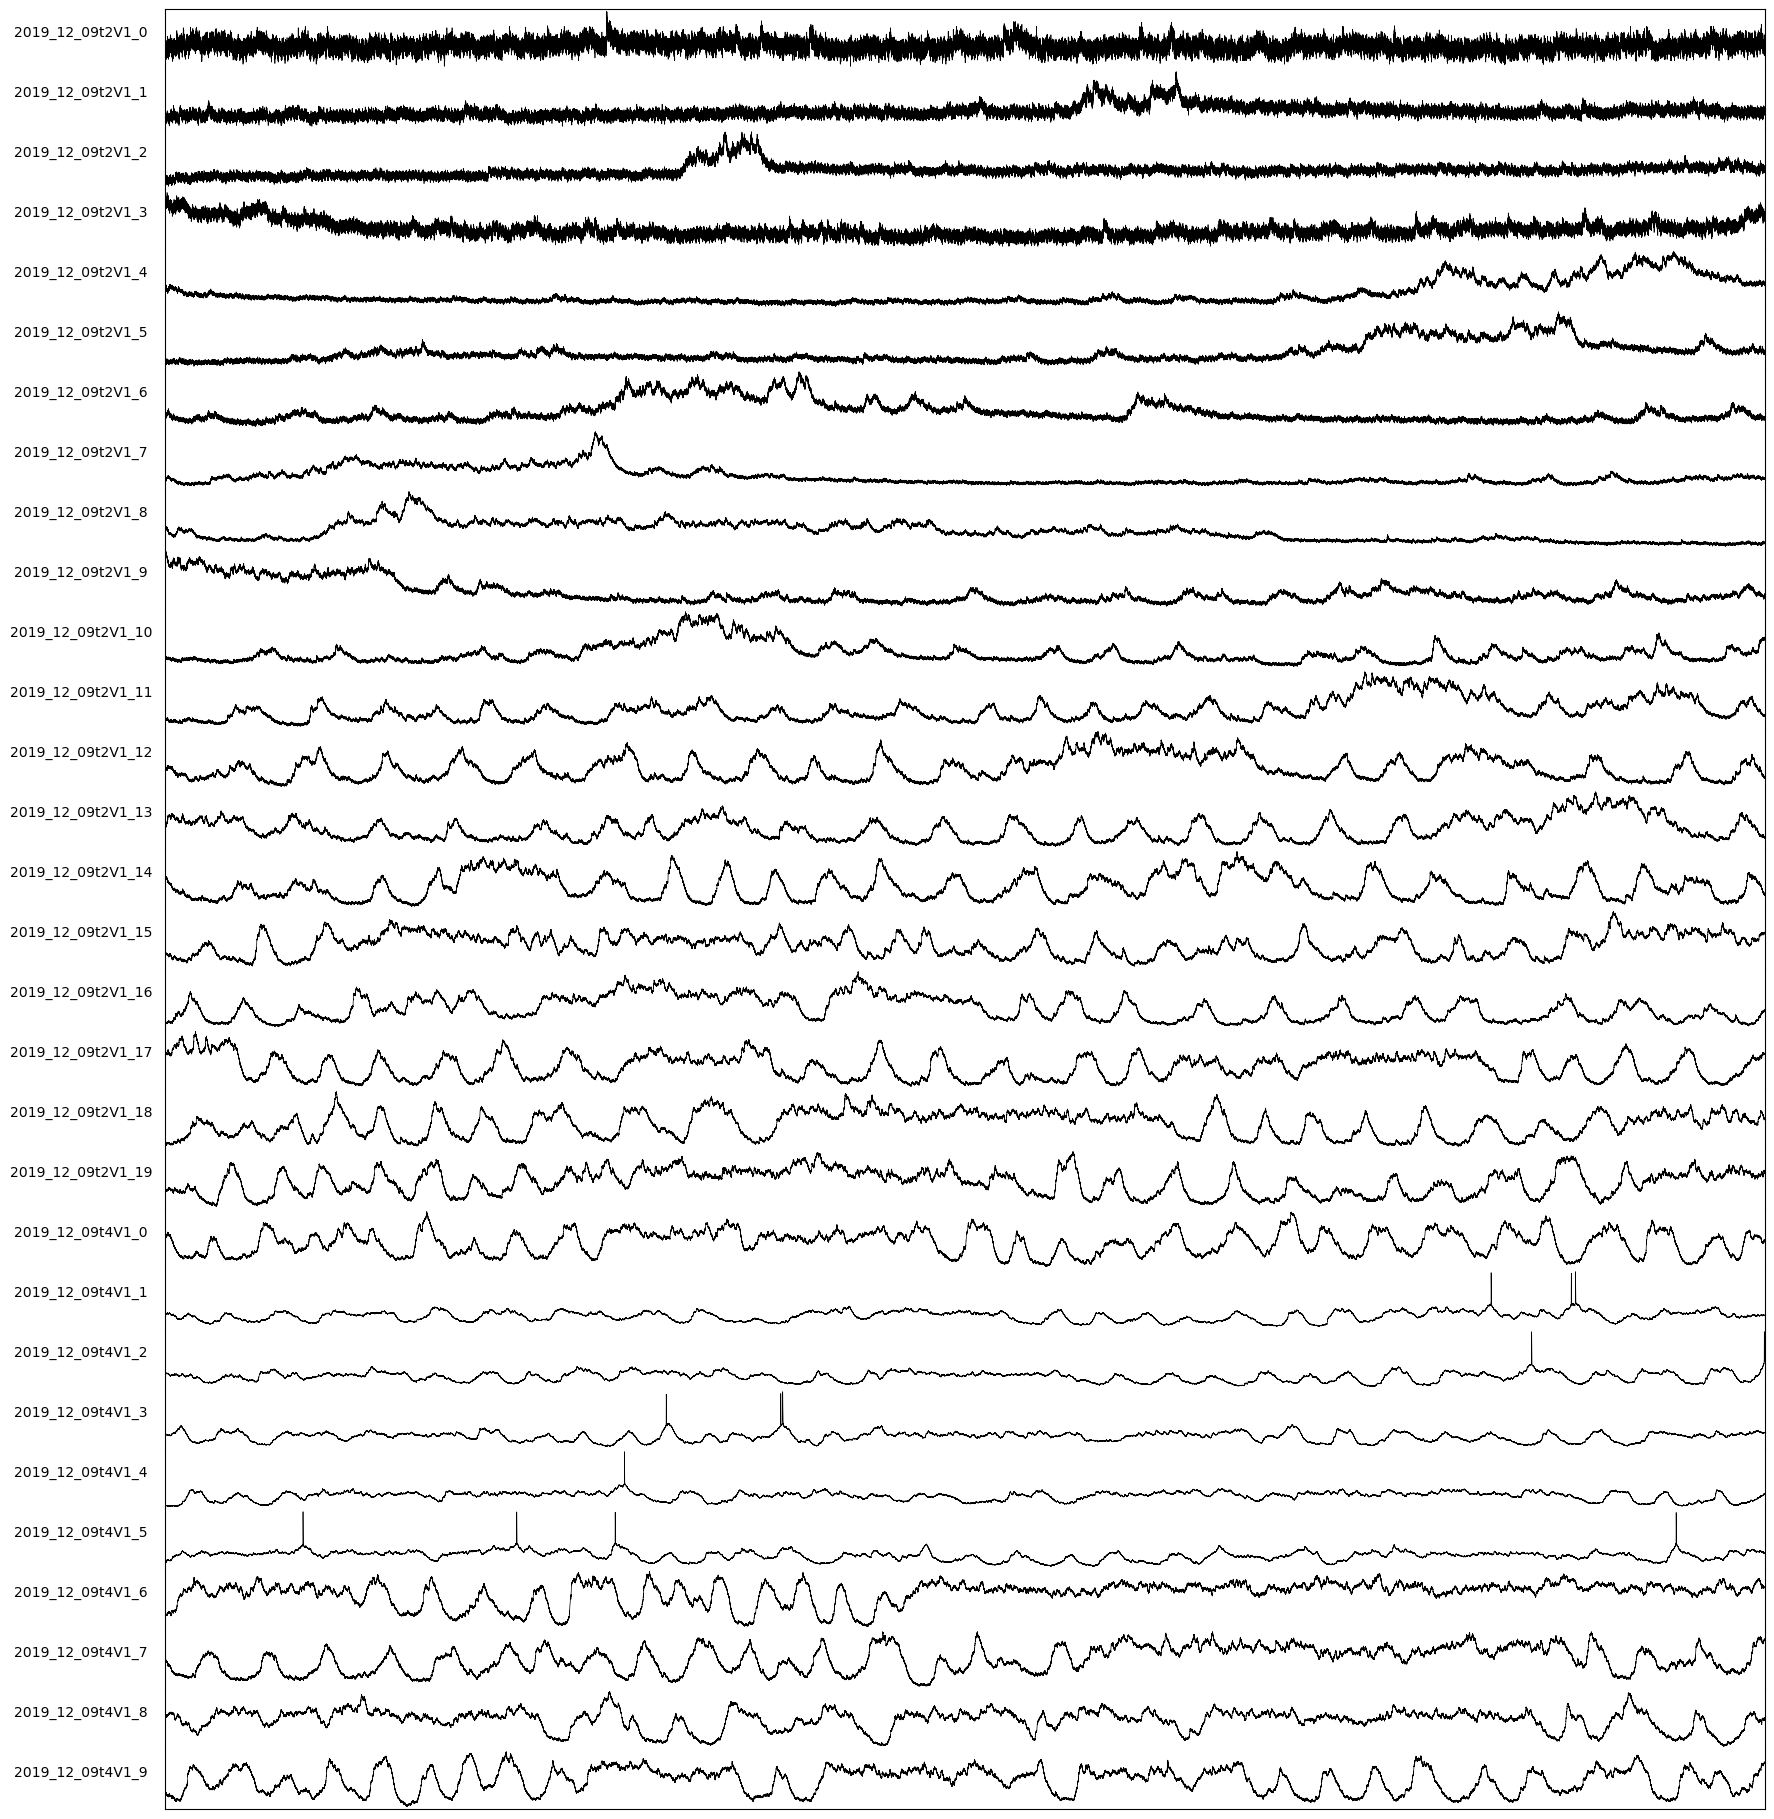

In [22]:
plot_channels(data = raw.get_data().T, time = raw.times, channels = raw.ch_names)

In [16]:
with open('output/spontaneous-movement/W1/C1/emg/filter.pkl', 'rb') as file:
    emg = pickle.load(file)

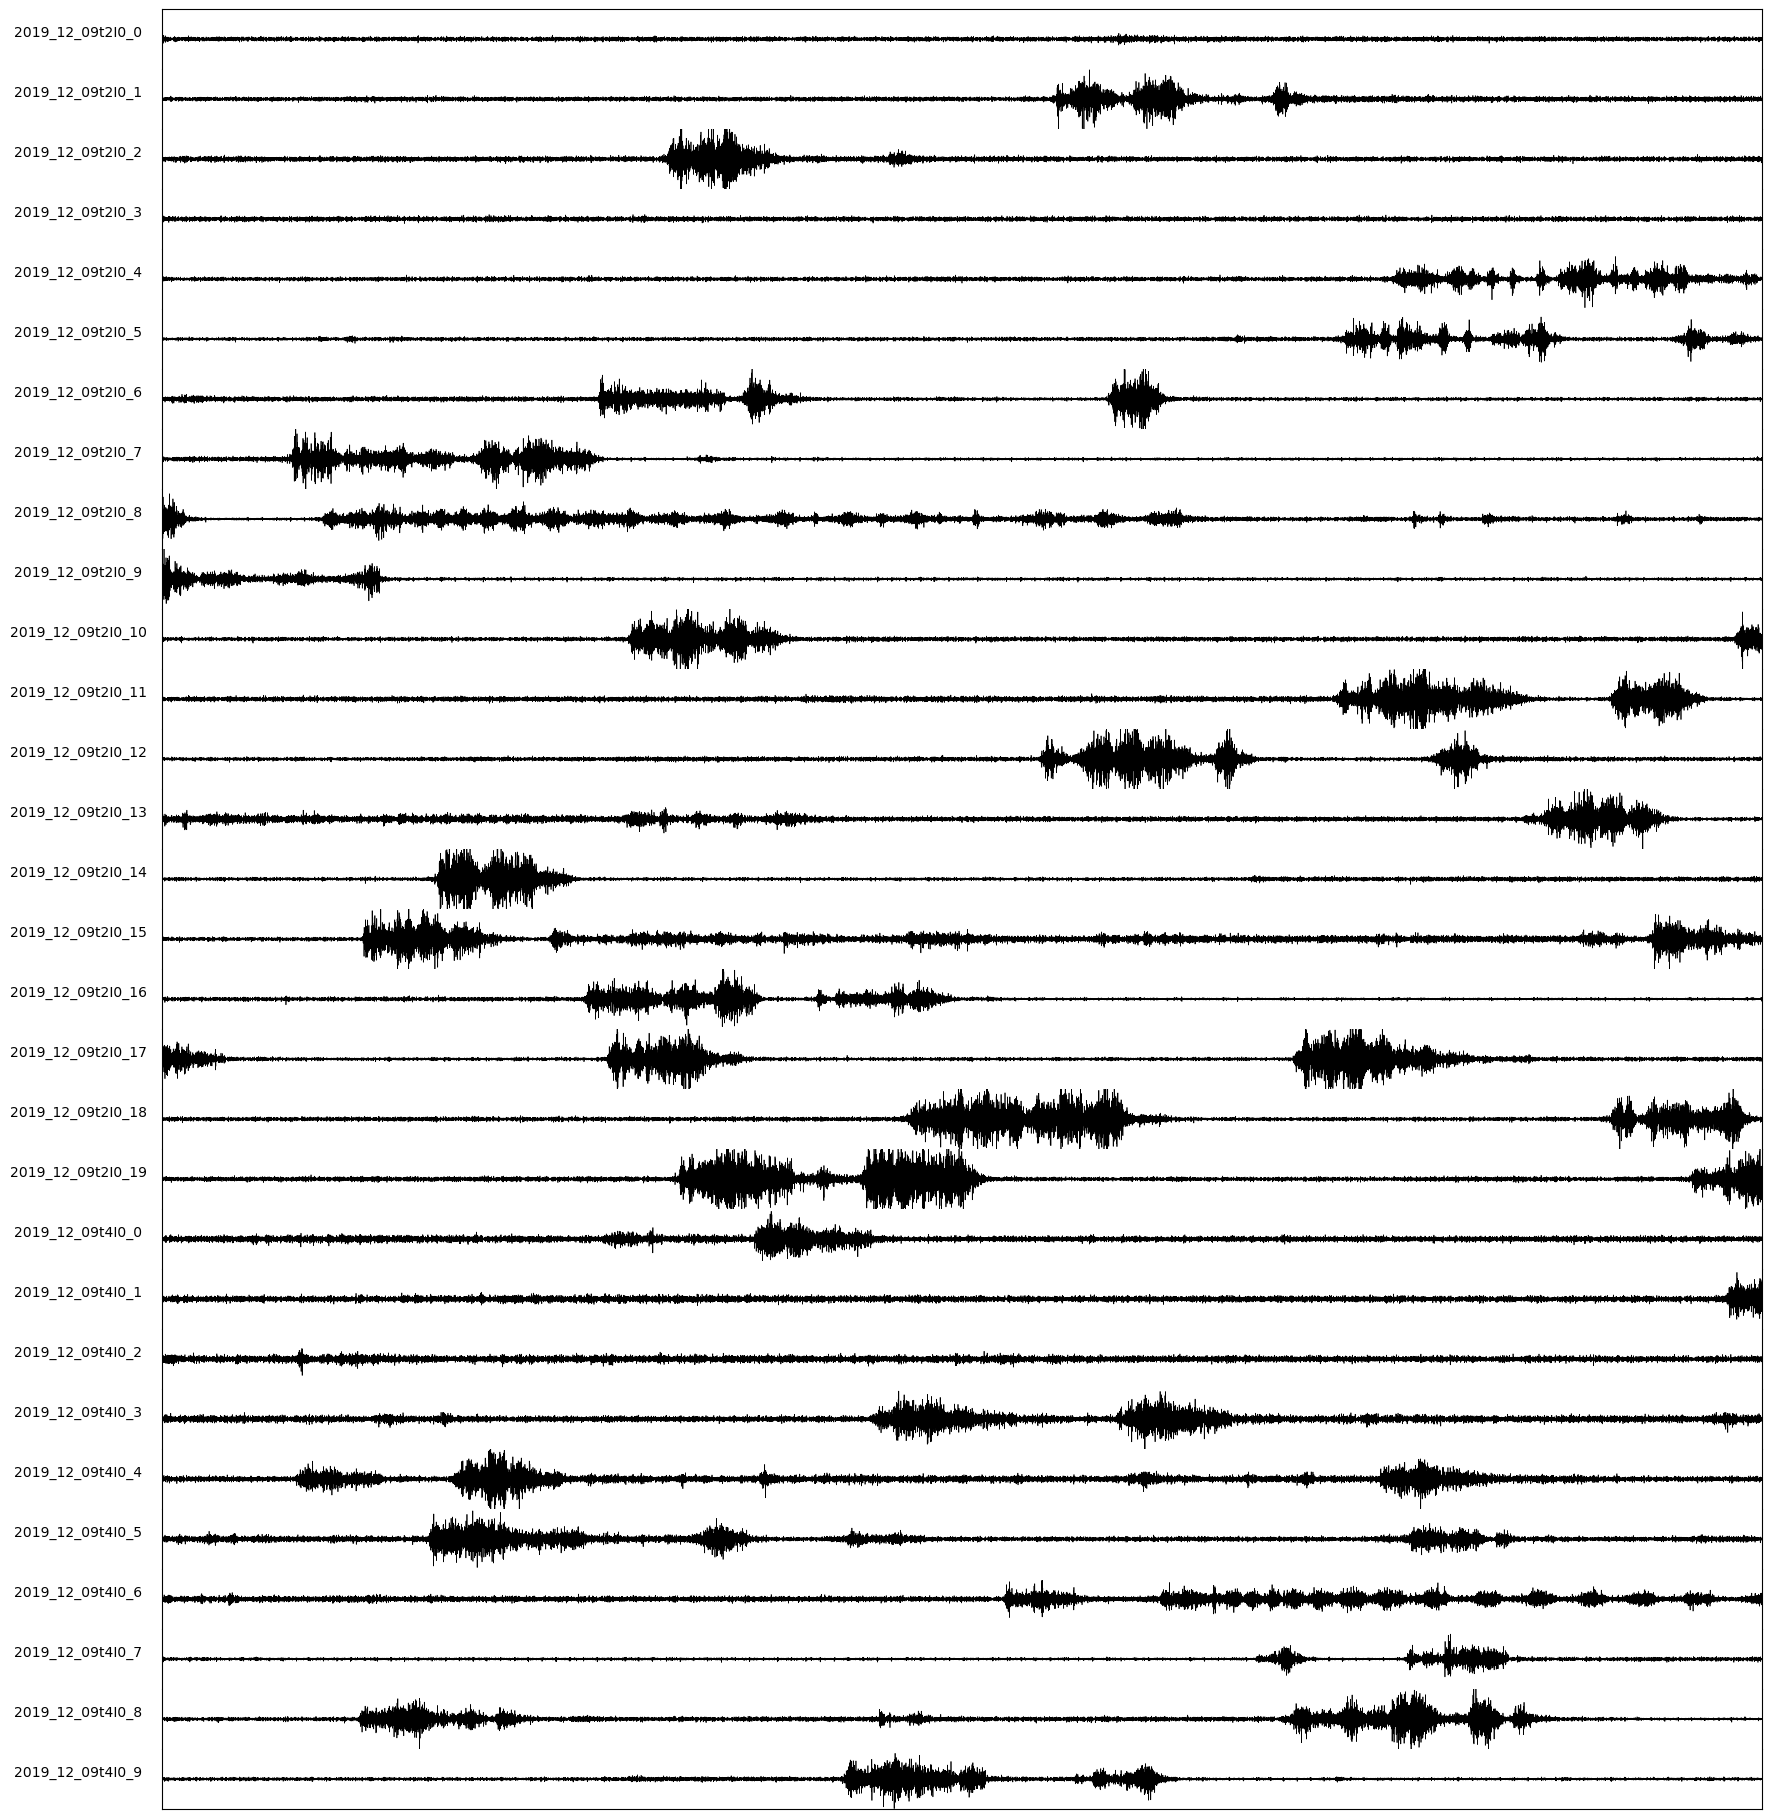

In [17]:
plot_channels(data = emg.get_data().T, time = emg.times, channels = emg.ch_names, limit = 4)

In [36]:
emg_channel = emg.ch_names[17]
vm_channel = raw.ch_names[17]

print(f'{emg_channel} {vm_channel}')

emg_data = emg.copy().pick(picks = [emg_channel]).get_data()[0]
scaled_emg_data = (emg_data - np.mean(emg_data)) / np.std(emg_data)
scaled_emg_data = scaled_emg_data / np.max(np.abs(scaled_emg_data))

vm_data = raw.copy().pick(picks = [vm_channel]).get_data()[0]
scaled_vm_data = (vm_data - np.mean(vm_data)) / np.std(vm_data)
scaled_vm_data = scaled_vm_data / np.max(np.abs(scaled_vm_data))

2019_12_09t2I0_17 2019_12_09t2V1_17


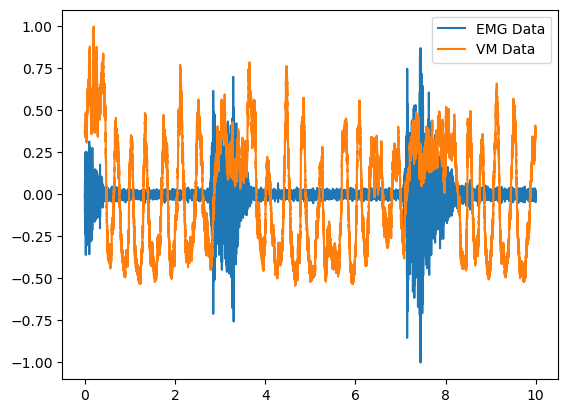

In [37]:
plt.plot(emg.times, scaled_emg_data, label='EMG Data')
plt.plot(raw.times, scaled_vm_data, label='VM Data')
plt.legend()
plt.show()

In [38]:
# The second signal (vm_data) is being lagged with respect to the first signal (emg_data).
# Specifically, vm_data is shifted through all possible lags relative to emg_data,
# and the cross-correlation values are calculated for each lag.
correlations = np.correlate(scaled_emg_data, scaled_vm_data, mode = 'full')

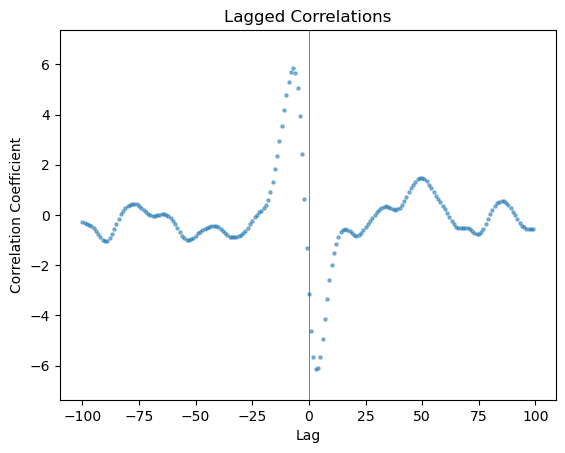

In [42]:
max_lag_dev = 0.005 # s
max_lag_points = int(max_lag_dev * raw.info['sfreq'])

# Generate lag values corresponding to the correlations
lags = np.arange(-len(emg_data) + 1, len(emg_data))
middle = np.where(lags == 0)[0][0]

x = lags[ (middle - max_lag_points):(middle + max_lag_points) ]
y = correlations[ (middle - max_lag_points):(middle + max_lag_points) ]

# Plot the lagged correlations
plt.scatter(x, y, s = 5, alpha = 0.5)
plt.title('Lagged Correlations')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.ylim(-np.max(np.abs(y)) * 1.2, np.max(np.abs(y)) * 1.2)
plt.axvline(x = 0, linewidth = 0.5, color = 'red', linestyle = '-')
plt.show()